<a href="https://colab.research.google.com/github/keulreobeu/bigdate_student/blob/main/%EC%83%88%EC%8B%B9_%ED%97%AC%EC%8A%A4%EC%BC%80%EC%96%B4_%EC%84%9C%EB%B9%84%EC%8A%A4%EA%B8%B0%ED%9A%8D/%EC%8B%9C%EA%B0%81%ED%99%94_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화
`작성자: 최원칠 강사`   
`traveler4d@gmail.com`


--활용데이터--

[건강보험심사평가원_진료비](https://www.data.go.kr/data/15055561/fileData.do)

[건강검진정보](https://www.data.go.kr/data/15007122/fileData.do)

[건강보험공단_진료건수](https://www.data.go.kr/data/15083145/fileData.do)

[기상청](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
)

In [ ]:
import zipfile
import os

zip_filename = '판다스.zip'
extract_folder = './'

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zipf:
    zipf.extractall(extract_folder)

## Matplotlib과 Seaborn
**Matplotlib**과 **Seaborn**은 파이썬에서 데이터를 그래프로 시각화 하기위한 대표적인 라이브러리 입니다.

- ***Matplotlib***

    - 파이썬에서 가장 오래된 시각화 라이브러리 중 하나로, 매우 유연하고 다양한 그래프를 제공
    - 사용자가 원하는 형태로 세부 조정을 통해 다양한 스타일을 적용할 수 있음

- ***Seaborn***

    - Matplotlib 위에서 만들어진 고수준의 시각화 라이브러리로, 통계적인 데이터를 더 쉽게 시각화 가능
    - 미리 설정된 테마와 스타일이 제공되어 보다 시각적으로 완성된 그래프를 손쉽게 그릴 수 있음
    - 데이터프레임을 데이터로 지정하여 컬럼명으로 쉽게 그래프 생성 가능

#### Matplotlib, Seaborn 설치

**pip 명령어**를 사용하여 Matplotlib과 Seaborn을 설치해 줍니다.

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## 1. 기본 그래프 작성

**matplotlib** 과 **seaborn** 을 활용하여 막대그래프, 선그래프, 산점도그래프와 같은 기본적인 그래프를 함수를 통해 그릴 수 있습니다.

이때, 함수에는 x축과 y축에 해당될 여러개의 1차원구조(리스트, 배열, 시리즈등)가 x,y 간의 순서와 개수에 맞게 입력되어야 합니다.



### 그래프 생성 및 기본 설정

#### 그림판(Figure)과 표(Axes)

`matplotlib`에는 그래프가 그려지는 표객체인 `Axes`와 Axes를 포함하는 그림판 객체인 `Figure`가 존재합니다.

 - `figure()` : 그림판(Figure) 설정  
 - `subplot()` : 그림판에 표(Axes)생성
 - `show()` : 그림판을 이미지로 출력

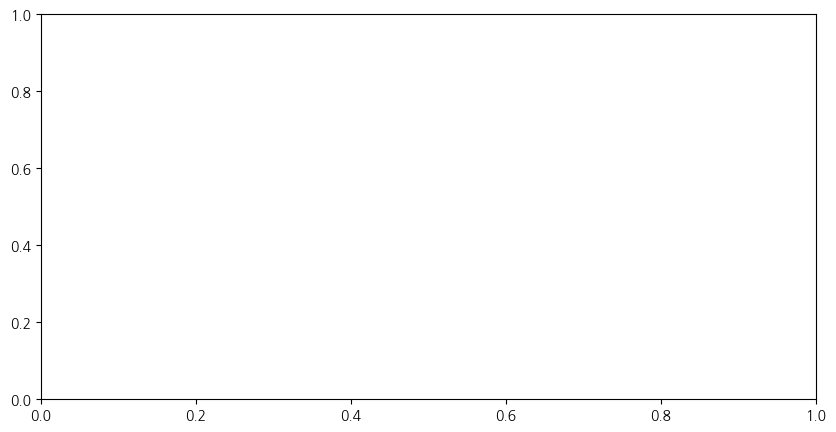

In [ ]:
import matplotlib.pyplot as plt

# figure() 으로 Figure 정의
# subplot() 으로 Axes 생성
plt.figure(figsize=(10,5))
ax = plt.subplot()
plt.show()

#### 한글폰트 설정하기
기본적으로 matplotlib에는 한글폰트가 설정되지 않아 한글데이터 표기가 불가능합니다. 따라서 직접 옵션 설정을 통해 한글 폰트를 입력해 주어야 합니다.

로컬 환경에서 실행하는 주피터 노트북이나 기본 파이썬 환경에서는 기존 폴더 경로에 있는 폰트를 다음 코드를 통해 설정해 줍니다.  (맥북은 `Apple Gothic`)

    import matplotlib.pyplot as plt

    # 한글 폰트 입력
    plt.rcParams['font.family']= 'Malgun Gothic'
    # 마이터스 부호 사용
    plt.rcParams['axes.unicode_minus'] = False

코랩 같이 기존 폰트경로에 한글 폰트가 없는경우 직접 폰트를 업로드 하고 다음 코드를 통해 폰트를 추가해 줍니다.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

#### 표에 정보 표기
`Axes` 객체의 다양한 함수를 활용하여 그래프를 세부적으로 설정 가능
- `set_title()` : 그래프의 제목을 설정
- `set_xlabel()` : X축의 레이블(이름)을 설정
- `set_ylabel()` : Y축의 레이블(이름)을 설정
- `set_xlim()` : X축 값의 범위를 설정
- `set_ylim()` : Y축 값의 범위를 설정
- `set_xticks()` : X축 눈금의 위치를 설정
- `set_yticks()` : Y축 눈금의 위치를 설정
- `set_xticklabels()` : X축 눈금의 텍스트(라벨)를 설정
- `set_yticklabels()` : Y축 눈금의 텍스트(라벨)를 설정
- `grid()` : 그래프의 그리드를 표시하거나 숨김
- `legend()` : 그래프의 범례를 표시
- `tick_params()` : X축과 Y축 눈금의 스타일(길이, 방향, 회전, 색상 등)을 설정

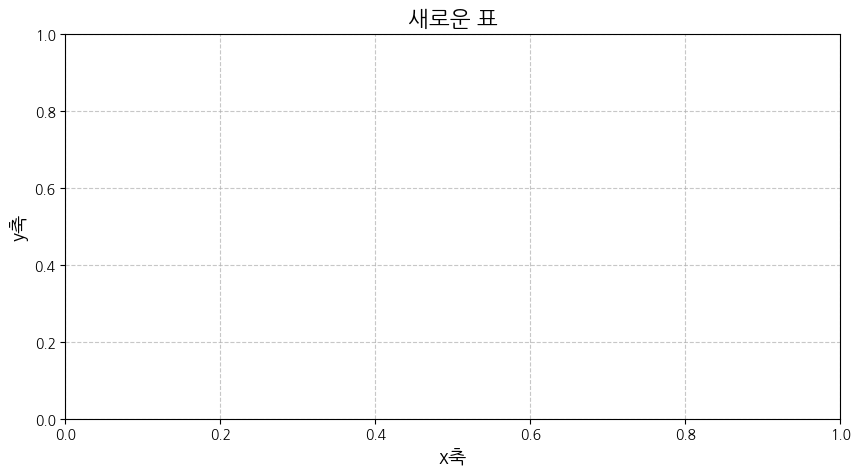

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.set_title('새로운 표', fontsize=16, fontweight="bold")
ax.set_xlabel('x축', fontsize=14)
ax.set_ylabel('y축', fontsize=14)
ax.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 막대그래프
막대 그래프는 범주형 데이터를 비교하는 데 유용하며, 각 범주에 해당하는 값을 막대의 길이로 표현하는 그래프입니다. 주로 항목에 대한 수치 비교 목적으로 많이 활용됩니다.

그래프에 나타낼 두 변수를 선택하여 **matplotlib**의 *bar()* 또는 **seaborn**의 *barplot()* 를 활용하여 막대그래프를 그릴수 있습니다.


In [ ]:
# 막대그래프 표현을 위한 데이터 집계
import pandas as pd

df_gp=pd.read_csv('data/건강보험심사평가원_진료비.csv')
df_seoul = df_gp[df_gp['시도'] == '서울']
df_gb = df_seoul.groupby('시군구', as_index = False)['환자수'].sum()
df_gb

,시군구,환자수
0,강남구,14980863
1,강동구,5089735
2,강북구,2746769
3,강서구,5353277
4,관악구,3870015
5,광진구,3616276
6,구로구,4324337
7,금천구,2341195
8,노원구,4599995
9,도봉구,2326696


#### **matplotlib**의 *bar()* 함수 활용
`matplotlib`은 `plt` 모듈 또는 `Axes`(표) 인스턴스에서 그래프 함수를 호출할 수 있습니다.

`bar()` 함수는 `x` 인자와 `height` 인자에 1차원의 데이터구조를 입력해줍니다.

- `x` : 표의 X축에 표현될 데이터 (범주형 추천)
- `height` : 표의 Y축에 표현될 데이터 (수치형 추천)
- `width` : 막대의 두께 (0~1)

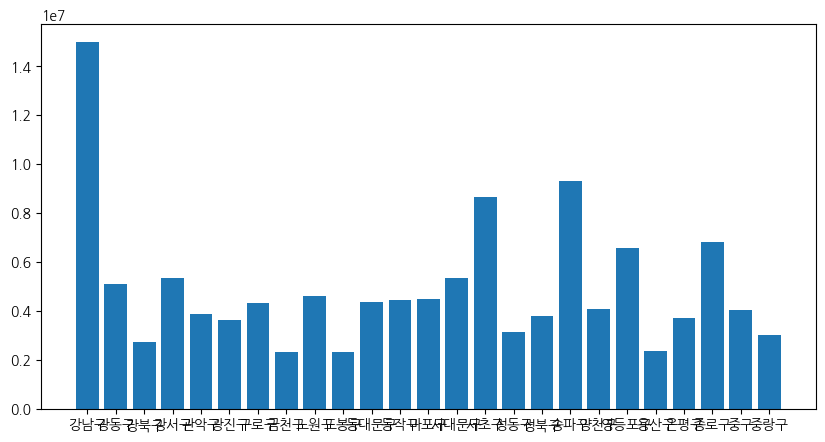

In [ ]:
import matplotlib.pyplot as plt

# bar() 함수로 막대그래프 생성
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.bar(x=df_gb['시군구'], height=df_gb['환자수'])
plt.show()

데이터가 문자열이면 라벨이 겹처져서 보이는 경우가 생깁니다. 이때 `tick_params()` 함수의 `rotation` 인자를 통해 라벨을 회전시킬 수 있습니다.

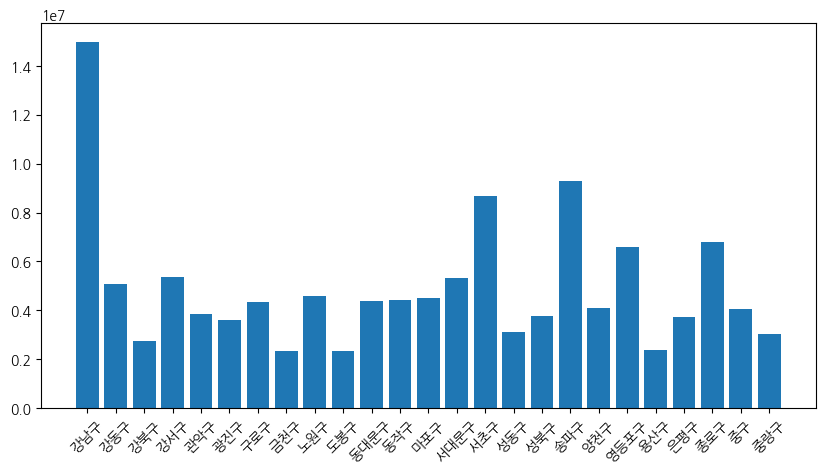

In [ ]:
# x축의 라벨을 회전시키기
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.bar(x=df_gb['시군구'], height=df_gb['환자수'])
ax.tick_params(axis="x", rotation=45)
plt.show()

> `rotation` 인자에 회전 각도를 설정, `axis` 인자에 대상 축 설정

#### **seaborn**의 *barplot()* 를 활용
seaborn은 내부적으로 matplotlib의 Figure와 Axes를 사용하므로, 먼저 Axes를 생성한뒤 `sns`(seaborn) 모듈의 그래프함수에 입력해주어야 합니다.

seaborn은 다양한 그래프 함수를 제공하면서도 인자를 최대한 공통적으로 설정할 수 있게 구성이 되어있습니다.

- `data` : 그래프를 그릴 데이터가 포함된 DataFrame을 입력
- `x` : 그래프의 X축에 설정될 1차원 데이터구조, 또는 `data` 인자 설정시 컬럼 이름를 입력
- `y` : 그래프의 Y축에 설정될 1차원 데이터구조, 또는 `data` 인자 설정시 컬럼 이름를 입력
- `as` :  matplotlib의 `Axes` 인스턴스 입력

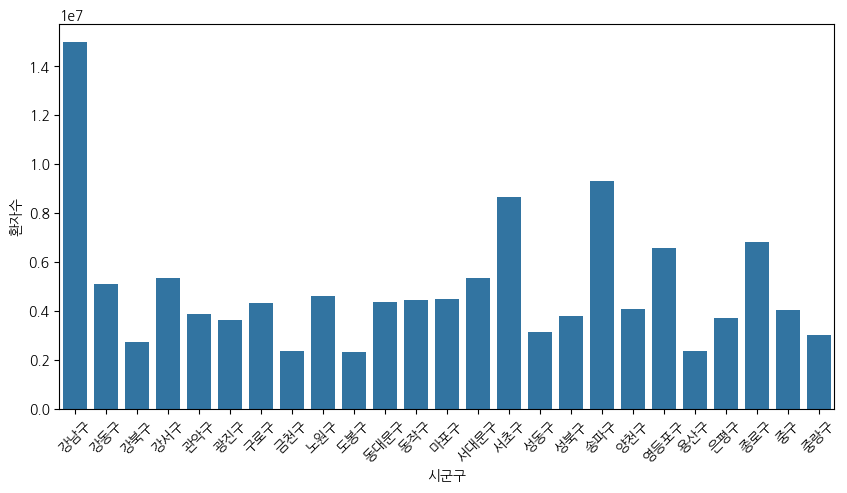

In [ ]:
import seaborn as sns

# barplot() 함수로 막대그래프 생성
plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.barplot(data = df_gb, x = '시군구', y = '환자수', ax = ax)
ax.tick_params(axis="x", rotation=45)
plt.show()

#### 수평 막대그래프 생성
matplotlib에선 `bar()` 대신 `barh()` 함수를 사용하여 수평 막대그래프를 생성할 수 있습니다. 이때 데이터는 `width`,`y`인자에 설정해줘야 하는것을 주의해야 합니다.

- `width` : 표의 X축에 표현될 데이터 (수치형 추천)
- `y` : 표의 Y축에 표현될 데이터 (범주형 추천)
- `height` : 막대의 두께 (0~1)

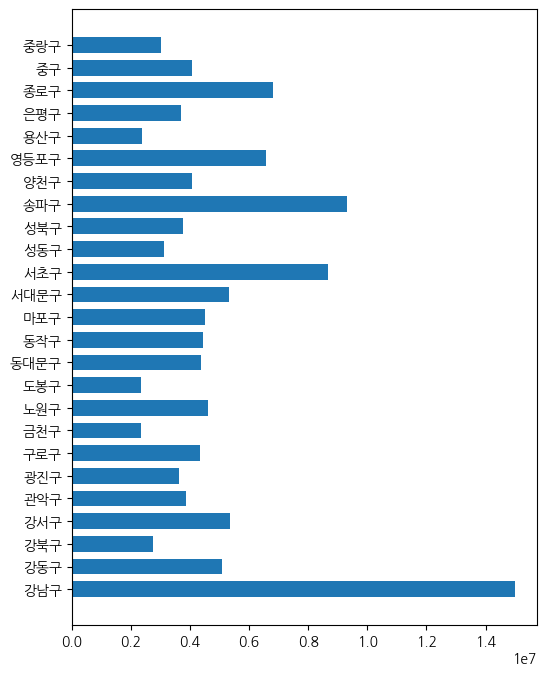

In [ ]:
# barh() 함수로 수평 막대그래프 생성
plt.figure(figsize=(6,8))
ax = plt.subplot()
ax.barh(width=df_gb['환자수'], y=df_gb['시군구'] , height=0.7)
plt.show()

> `barh()` 에선 `height` 인자가, `bar()` 에선 `width` 인자가 막대의 두께를 의미     

seaborn의 `barplot()` 함수는 비연속형 타입을 가진 데이터가 `x`, `y` 중 어떤 인자에 할당되냐에 따라 수직, 수평이 결정됩니다.

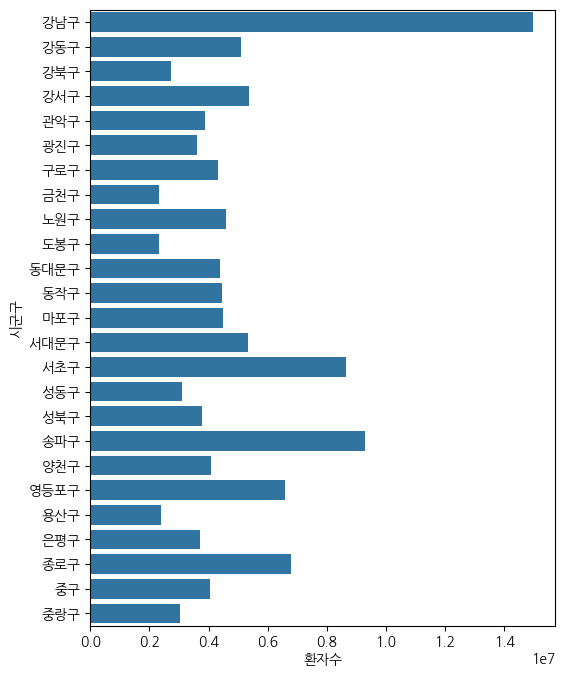

In [ ]:
# barplot() 함수로 수평 막대그리기
plt.figure(figsize=(6,8))
ax = plt.subplot()
# y 인자에 범주형 설정
sns.barplot(data = df_gb, x = '환자수', y = '시군구', ax = ax)
plt.show()

> 비연속형 : object, str, category, bool


### 선그래프
선 그래프는 시간 또는 순서의 흐름에 따른 추이 변화를 관찰하기 좋은 그래프로, 흐름에 따른 값의 변화를 표현합니다. 따라서 기본적으로 순서의 흐름이 있는 데이터가 필요합니다.

그래프에 나타낼 두 변수를 선택하여 **matplotlib**의 `plot()` 또는 **seaborn**의 `lineplot()` 를 활용하여 선그래프를 생성할 수 있습니다.

#### **matplotlib**의 *plot()* 함수

`plot()` 함수는 인자이름 없이 순서대로 데이터를 입력합니다.

- `첫번째인자`: X축에 입력될 순서가 있는 1차원 데이터구조 (날짜형 추천)
- `두번째인자`: Y축에 입력될 1차원 데이터구조 (수치형 추천)

In [ ]:
import pandas as pd
df_w=pd.read_csv('data/기상청2024.csv')
df_seoul = df_w[df_w['지점명'] == '서울']
df_seoul

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),지면온도(°C)
1074,서울,2024-01-01,3.165217,0.000,1.647826,84.130435,1016.247826,1.966667,-0.156522
1075,서울,2024-01-02,3.004167,0.000,1.475000,73.958333,1011.708333,NaN,0.337500
1076,서울,2024-01-03,2.154167,0.200,1.616667,79.416667,1008.416667,NaN,0.308333
1077,서울,2024-01-04,0.995833,NaN,1.870833,75.125000,1011.125000,NaN,-0.333333
1078,서울,2024-01-05,5.154167,0.000,2.312500,76.708333,1008.975000,NaN,1.904167
...,...,...,...,...,...,...,...,...,...
1427,서울,2024-12-19,-1.762500,NaN,1.704167,46.958333,1018.391667,NaN,-2.383333
1428,서울,2024-12-20,1.179167,0.000,1.862500,58.083333,1011.754167,0.200000,-1.033333
1429,서울,2024-12-21,-0.154167,0.825,2.883333,76.625000,1007.758333,1.516667,-0.387500
1430,서울,2024-12-22,-3.445833,NaN,2.100000,52.166667,1016.054167,1.025000,-2.254167


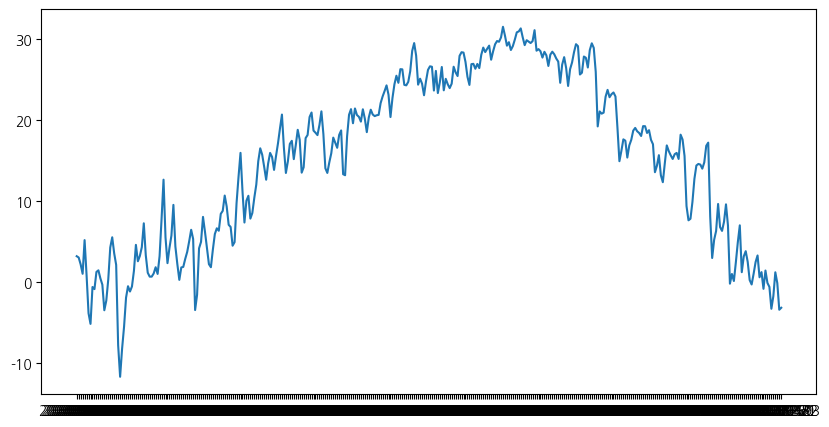

In [ ]:
# plot() 함수로 선그래프 생성
x = df_seoul['일시']
y = df_seoul['기온(°C)']

plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.plot(x, y)
plt.show()


> 입력된 데이터가 비연속형(문자열)이면 모든 눈금을 표현하기 때문에 겹치는 현상 발생

x축에 입력될 데이터는 연속형 타입으로 설정되야 정상적으로 표기가 됩니다. 특히 날짜 데이터는 날짜형(`datetime64`)로 활용하기 위해선 타입 변환이 필요합니다.

/tmp/ipython-input-3155665471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['일시'] = df_seoul['일시'].astype('datetime64[ns]')


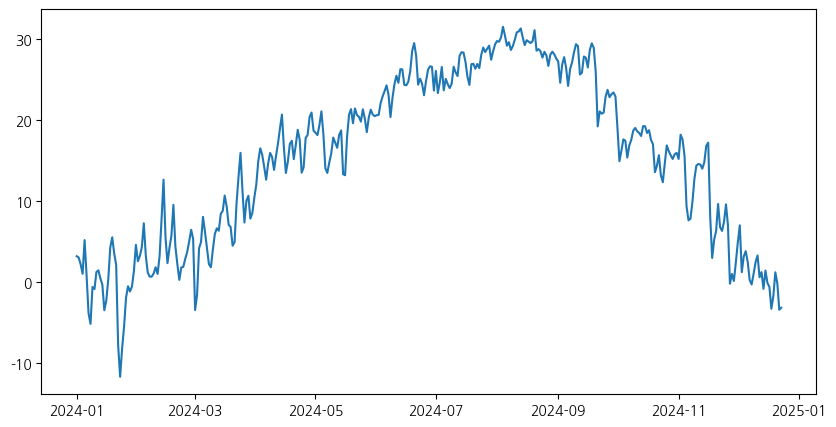

In [ ]:
# 데이터타입을 날짜형을 변환
df_seoul['일시'] = df_seoul['일시'].astype('datetime64[ns]')

x = df_seoul['일시']
y = df_seoul['기온(°C)']

plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.plot(x, y)
plt.show()


#### **seaborn**의 *lineplot()* 를 활용
`barplot()`과 동일한 인자를 사용합니다. 이때 `x`인자에는 순서가 있는 연속형 타입이 들어가주어야 합니다.

/tmp/ipython-input-3233362592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['일시'] = df_seoul['일시'].astype('datetime64[ns]')


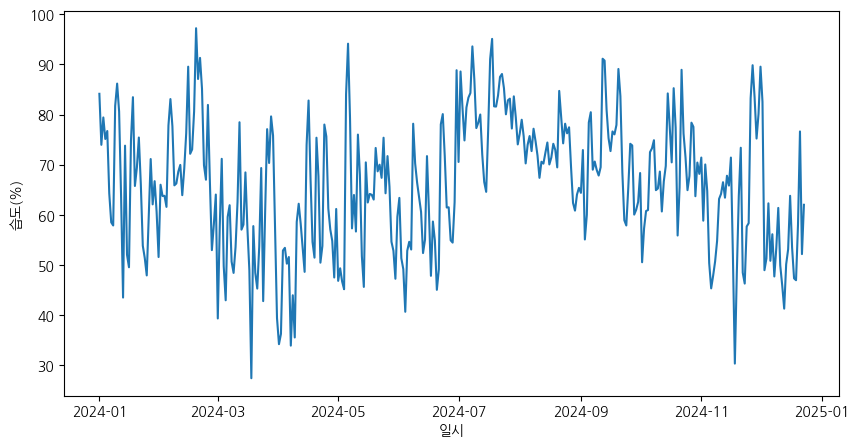

In [ ]:
# lineplot() 함수로 그리기

# 날짜형 변환 필수!
df_seoul['일시'] = df_seoul['일시'].astype('datetime64[ns]')

plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.lineplot(data = df_seoul, x ='일시', y='습도(%)', ax=ax)
plt.show()


### 산점도그래프
산점도 그래프는 수치형 컬럼(변수) 값을 x, y축에 점으로 표시하여 변수 간의 관계와 분포를 시각적으로 표현하는 그래프입니다. 데이터의 전반적인 분포를 한눈에 볼수 있으며 이를통해 변수간의 관계도 파악할 수 있습니다.

그래프에 나타낼 두변수 선택하여 **matplotlib**의 *scatter()* 또는 **seaborn**의 *scatterplot()* 를 활용하여 산점도그래프 생성합니다. 이때 점의 크기도 변수로 설정가능하여 3개의 변수를 넣을 수도 있습니다.

In [ ]:
df_w=pd.read_csv('data/기상청2024.csv')
df_w

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),지면온도(°C)
0,대구,2024-01-01,3.752174,NaN,1.221739,75.130435,1020.873913,NaN,2.330435
1,대구,2024-01-02,5.983333,NaN,1.825000,64.833333,1015.275000,NaN,5.366667
2,대구,2024-01-03,4.383333,1.40,3.304167,71.083333,1012.054167,NaN,4.404167
3,대구,2024-01-04,3.220833,NaN,2.137500,54.458333,1015.600000,NaN,0.920833
4,대구,2024-01-05,4.179167,NaN,1.329167,67.625000,1014.175000,NaN,1.470833
...,...,...,...,...,...,...,...,...,...
1785,제주,2024-12-19,5.675000,0.00,4.212500,49.500000,1025.675000,NaN,6.720833
1786,제주,2024-12-20,6.791667,0.12,2.162500,65.750000,1021.104167,NaN,6.500000
1787,제주,2024-12-21,7.558333,0.10,7.279167,57.666667,1018.441667,NaN,6.066667
1788,제주,2024-12-22,5.479167,0.00,5.154167,53.958333,1024.500000,NaN,4.754167


#### **matplotlib**의 *scatter()* 함수
matplotlib의 `scatter()` 함수는 `x`,`y`인자와 추가로 `s`인자를 활용해 데이터를 입력할 수 있습니다.

- `x` : 그래프의 X축에 설정될 1차원 데이터구조
- `y` : 그래프의 Y축에 설정될 1차원 데이터구조
- `s` : 점의 크기에 설정될 1차원 데이터구조 또는 단일 값


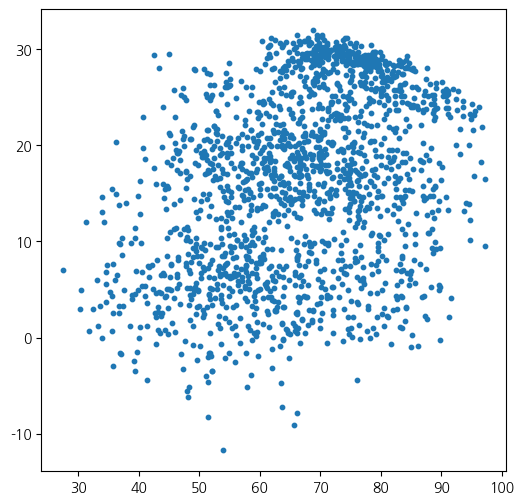

In [ ]:
# scatter() 함수로 산점도 그래프 생성
plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.scatter(x=df_w['습도(%)'], y=df_w['기온(°C)'], s=10)
plt.show()

> 산점도의 분포를 보고 두 변수간의 관계 파악 가능

`alpha`인자를 통해 점의 투명도 설정도 가능합니다. (0~1)

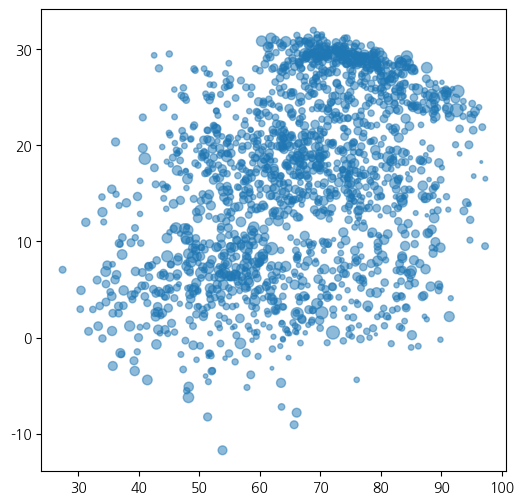

In [ ]:
# 점의 크기와 투명도 설정
x = df_w['습도(%)']
y = df_w['기온(°C)']
s = df_w['풍속(m/s)'] *10

plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.scatter(x=x, y=y, s=s, alpha=0.5)
plt.show()

#### seaborn의 scatterplot() 를 활용

seaborn의 `scatterplot()` 함수에는 점의 크기를 `size` 인자로 설정하며, 추가로 `hue`인자를 통해 그룹별 색상 표기가 가능합니다

- `hue`: 입력된 컬럼 또는 데이터구조의 그룹별로 묶어 그룹별 색상표기를 나누어줌

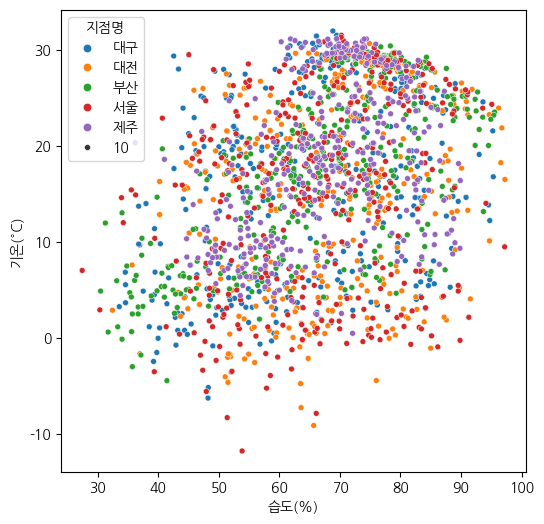

In [ ]:
# scatterplot() 함수로 산점도 그래프 생성
plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.scatterplot(data=df_w, x='습도(%)', y='기온(°C)', size=10, hue='지점명', ax=ax)
plt.show()

#### seaborn의 relplot() 를 활용
seaborn은 `relplot()` 함수를 통해서도 산점도 그래프를 그릴수 있습니다.

- `kind` : 변수 관계를 그리기 위한 그래프 종류 (`scatter`-기본값, `line`)

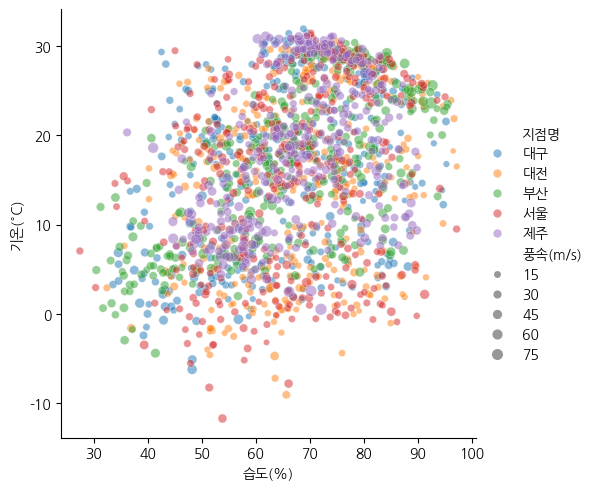

In [ ]:
# relplot() 함수로 정보를 표 바깥으로
sns.relplot(kind='scatter',data=df_w, x='습도(%)', y='기온(°C)',
            size=df_w['풍속(m/s)'] *10,
            hue='지점명', alpha=0.5)
plt.show()

> 범례 표기가 표 바깥에 그려지기 때문에 좀더 깔끔하게 활용가능


## 실습 해보기

#### [실습 1]
실습데이터 폴더의 진료정보_통합.csv 파일에서 다음 작업을 수행

1. '날짜'가 '2023' 보다 크고 '지역명'이 '서울'인 관측치를 인덱싱
2. 1번 결과에서 날짜별 감기의 추이를 선그래프로 그리기(데이터타입 유의)
---
3. 기존 데이터에서 '지역명'이 '전국'이 아닌 관측치만 인덱싱
4. 3번 결과에서 '지역명'으로 그룹화 하여 감기의 평균을 수직 막대그래프로 그리기
---
5. 기존 데이터에서 '날짜'가 '2023'보다 크고 '지역명'이 '전국'이 아닌 관측치만 인덱싱
6. 5번 결과에서 '감기'와 '피부병'에 관계를 산점도 그래프로 그리고 '지역명' 별로 색상이 다르게 표현

In [ ]:
df = pd.read_csv('/content/실습데이터/진료정보_통합.csv')
df.head()

,날짜,시도지역코드,감기,천식,눈병,피부병,지역명
0,2014-01-01,11,5992,715,247,246,서울
1,2014-01-02,11,101309,8139,8811,10963,서울
2,2014-01-03,11,84210,6997,7829,10113,서울
3,2014-01-04,11,74899,6137,6350,8043,서울
4,2014-01-05,11,7695,534,234,407,서울


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57919 entries, 0 to 57918
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      57919 non-null  object
 1   시도지역코드  57919 non-null  int64 
 2   감기      57919 non-null  int64 
 3   천식      57919 non-null  int64 
 4   눈병      57919 non-null  int64 
 5   피부병     57919 non-null  int64 
 6   지역명     57919 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57919 entries, 0 to 57918
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      57919 non-null  datetime64[ns]
 1   시도지역코드  57919 non-null  int64         
 2   감기      57919 non-null  int64         
 3   천식      57919 non-null  int64         
 4   눈병      57919 non-null  int64         
 5   피부병     57919 non-null  int64         
 6   지역명     57919 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 3.1+ MB


In [ ]:
df[(df['날짜'].dt.year >= 2023) & (df['지역명'] == '서울')]

,날짜,시도지역코드,감기,천식,눈병,피부병,지역명
3287,2023-01-01,11,9410,292,127,211,서울
3288,2023-01-02,11,112769,3699,7630,10736,서울
3289,2023-01-03,11,79961,3098,6571,8739,서울
3290,2023-01-04,11,72590,2895,5985,7495,서울
3291,2023-01-05,11,75892,2974,6259,7824,서울
...,...,...,...,...,...,...,...
3402,2023-04-26,11,104387,4008,8118,8762,서울
3403,2023-04-27,11,110121,3938,9049,8909,서울
3404,2023-04-28,11,124276,4658,9994,11209,서울
3405,2023-04-29,11,91335,3014,5884,6806,서울


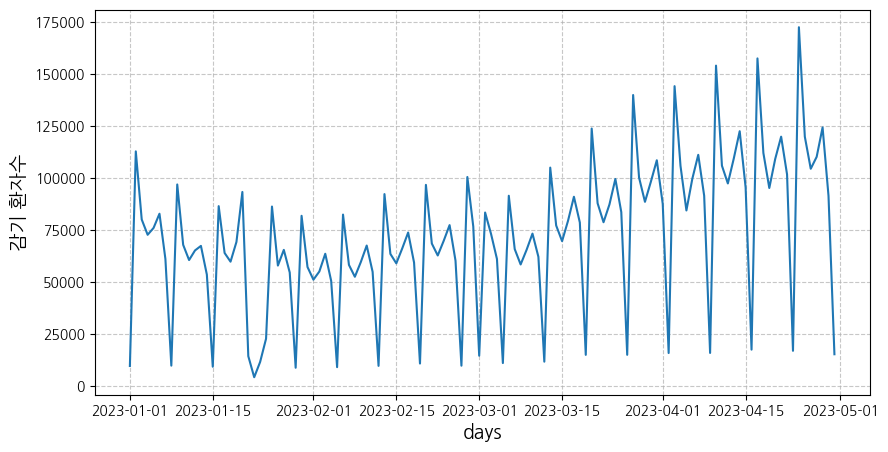

In [ ]:
df_seoul_2023 = df[(df['날짜'].dt.year >= 2023) & (df['지역명'] == '서울')]

plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.plot(df_seoul_2023['날짜'], df_seoul_2023['감기'])
ax.set_xlabel('days', fontsize=14)
ax.set_ylabel('감기 환자수', fontsize=14)
ax.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [ ]:
locla_df = df[df['지역명'] != '전국']

In [ ]:
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


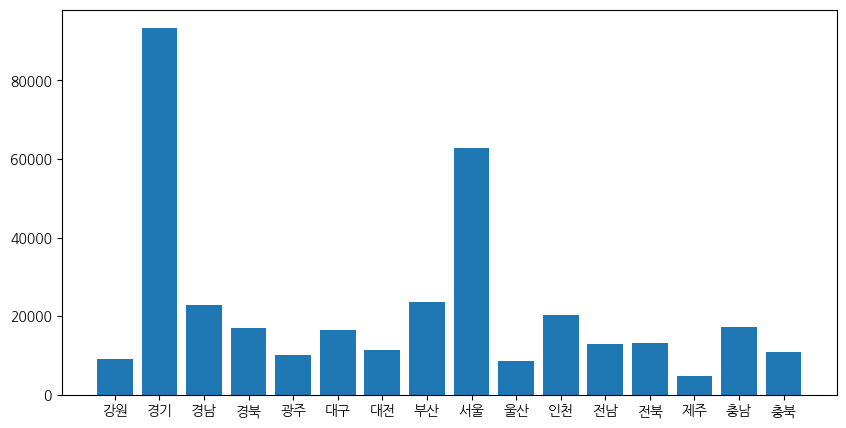

In [ ]:
local_gr_fd = locla_df.groupby('지역명', as_index=False)['감기'].mean()
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.bar(x=local_gr_fd['지역명'], height=local_gr_fd['감기'])
plt.show()

In [ ]:
year_local_df = df[(df['날짜'].dt.year >= 2023) & (df['지역명'] != '전국')]

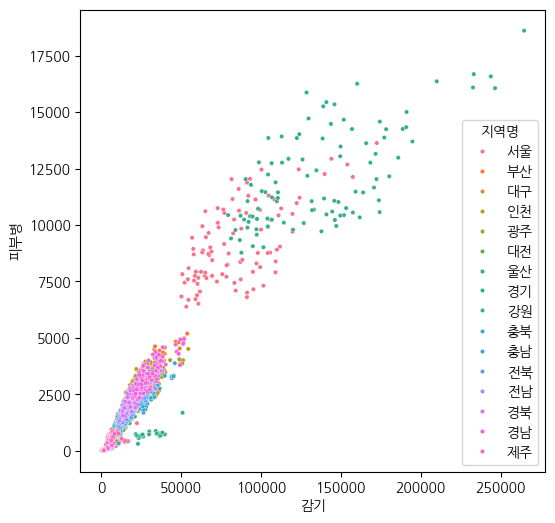

In [ ]:
plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.scatterplot(data=year_local_df, x='감기', y='피부병', hue='지역명', s=10, ax=ax)
plt.show()

<br>

## 특수 그래프 그리기

**matplotlib** 과 **seaborn**은 X축과 Y축의 값을 그대로 보여주는 기본 그래프 뿐만 아니라, 특수한 목적을 가지고 통계 수치에 따라 표현되는 그래프도 제공합니다.

**대표 특수그래프**
- 히스토그램 : 특정한 변수의 수치적인 분포를 표현
- 히트맵 : 표(테이블)형식의 데이터의 수치적인 특성을 색상으로 강조
- 상자그림 : 특정한 변수의 백분율 분포를 표현

<br>

### 히스토그램
**히스토그램(Histogram)**은 데이터의 분포를 시각적으로 나타내는 그래프로, 연속형 변수를 일정한 구간(빈, bin)으로 나누어 각 구간에 속하는 데이터의 빈도수를 막대의 높이로 표시합니다.

- 히스토그램은 1개의 변수만 입력
- X축은 입력된 변수의 수치범위구간을 나눔
- Y축은 입력된 변수의 범위내 데이터 개수를 표현

In [ ]:
import pandas as pd
df_gp = pd.read_csv('data/건강보험심사평가원_진료비.csv')
df_gp

,진료년도,시도,시군구,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금
0,2019,서울,강남구,2953972,17525550,19281766,2281041396930,1768219488330
1,2019,서울,강동구,1004187,10063846,11308962,887893194900,673549483880
2,2019,서울,강서구,1026901,9849006,10478896,550600112360,406600499030
3,2019,서울,관악구,788020,7273067,7661573,342405974720,255354135770
4,2019,서울,구로구,883106,8010391,9016461,683324231670,520879380140
...,...,...,...,...,...,...,...,...
1246,2023,경남,거제시,277173,3594694,3991625,223970855500,165326015830
1247,2023,경남,양산시,603128,6670829,7933192,745625367740,588172943790
1248,2023,제주,서귀포시,288023,3220335,3295985,147527363570,111041876650
1249,2023,제주,제주시,706540,9784688,10665279,718555478710,550046798870


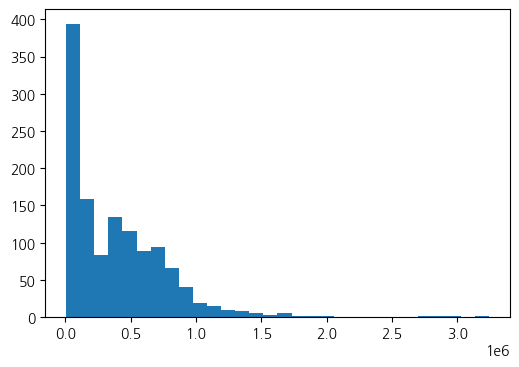

In [ ]:
# hist()을 활용한 히스토그램
plt.figure(figsize=(6,4))
ax = plt.subplot()
ax.hist(df_gp['환자수'], bins=30)
plt.show()

> `bins` : 분할 범위의 크기를 설정하는 인자 (클수록 세부적으로 범위가 나뉨)

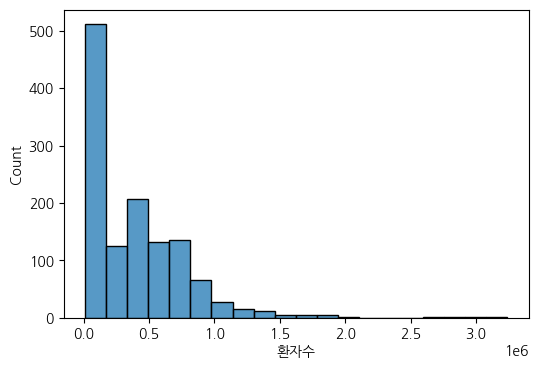

In [ ]:
# histplot()을 활용한 히스토그램
plt.figure(figsize=(6,4))
ax = plt.subplot()
sns.histplot(data=df_gp,
             x='환자수',
             bins=20,
             ax=ax)
plt.show()

> 1개의 변수만 입력하므로 `y`인자는 생략

<br>

### 히트맵
히트맵(Heatmap)은 행과 열로 이루어진 2차원 맵 형태의 데이터에서 각 셀의 색상을 데이터 값의 크기에 따라 다르게 강조하는 그래프입니다. 이를 통해 데이터의 패턴, 분포등을 직관적으로 파악이 가능합니다.

**seaborn**은 테이블형(매트릭스, 표)의 데이터를 시각화 하는 히트맵 `heatmap()` 함수를 제공합니다.

In [ ]:
import pandas as pd
df_gp = pd.read_csv('data/건강보험심사평가원_진료비.csv')
df_gp

,진료년도,시도,시군구,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금
0,2019,서울,강남구,2953972,17525550,19281766,2281041396930,1768219488330
1,2019,서울,강동구,1004187,10063846,11308962,887893194900,673549483880
2,2019,서울,강서구,1026901,9849006,10478896,550600112360,406600499030
3,2019,서울,관악구,788020,7273067,7661573,342405974720,255354135770
4,2019,서울,구로구,883106,8010391,9016461,683324231670,520879380140
...,...,...,...,...,...,...,...,...
1246,2023,경남,거제시,277173,3594694,3991625,223970855500,165326015830
1247,2023,경남,양산시,603128,6670829,7933192,745625367740,588172943790
1248,2023,제주,서귀포시,288023,3220335,3295985,147527363570,111041876650
1249,2023,제주,제주시,706540,9784688,10665279,718555478710,550046798870


`heatmap()` 함수에는 다음과 같은 인자를 통해 표현을 설정할 수 있습니다.

- `data` : 2차원 맵형식 데이터구조
- `cmap` : 그래프에 표현될 색상 분포 - [색상표](https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes)
- `annot` : 데이터 수치값 표기 유무
- `fmt` : 소수점 표현 정규식 ex) `'.2f'` - 소수점 둘째자리

/tmp/ipython-input-4103115502.py:3: FutureWarning: The provided callable <function sum at 0x7d4f1ad4b880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df_gp,


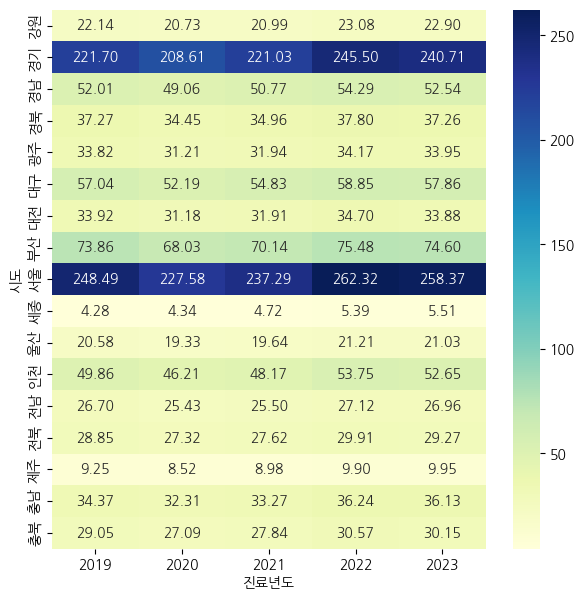

In [ ]:
import numpy as np

pivot = pd.pivot_table(df_gp,
                       index='시도',
                       columns='진료년도',
                       values='환자수',
                       aggfunc=np.sum)
pivot = pivot / 100000

plt.figure(figsize=(7,7))
ax = plt.subplot()
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

<br>

### 상자그림
상자 그림은 사분위수를 활용하여 데이터의 분포를 시각적으로 나타내는 그래프로, 데이터의 중앙 경향, 변동성, 이상치를 파악하는 데 유용합니다.

- **matplotlib** 과 **seaborn**은 사분위를통한 데이터의 분포를 표현해주는 상자그림을 `boxplot()` 함수로 제공합니다.

**사분위수(quartile)**
- 최솟값(minimum, 0%)
- Q1(1st Quartile, 25%)
- 중앙값(median, 50%)
- Q3(3rd Quartile, 75%)
- 최댓값(maximum, 100%)

**상자그림**
- 백분율 분포가 그려질 1개의 변수만 입력
- Y축에 사분위수에 따른 박스를 그림
<left><img src="https://drive.google.com/thumbnail?id=1wpAuFd7xl4pokdJLSox3wehS8-tjxluD&sz=w1000" width="400"/></left>



In [ ]:
import pandas as pd
df_ins = pd.read_csv('insurance.csv')
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


`quantile()` 함수를 통해 백분율 값을 얻을 수 있습니다. 이를 통해 사분위수를 확인합니다.

In [ ]:
# 사분위는 pandas의 quantile 함수로 값만 계산 가능
df_ins[['age','bmi']].quantile(0.75) # 75%이므로 Q3


,0.75
age,51.00000
bmi,34.69375


`boxplot()` 또한 히스토그램과 마찬가지로 1개의 변수만 입력해주어야 합니다.


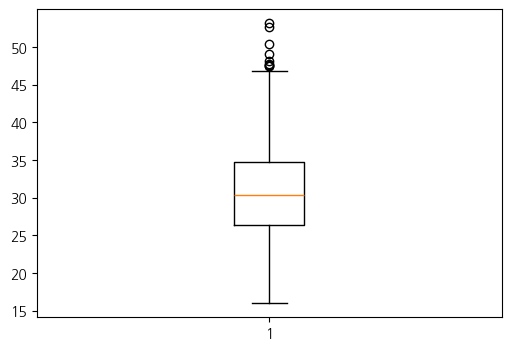

In [ ]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.figure(figsize=(6,4))
ax = plt.subplot()
plt.boxplot(df_ins['bmi'])
plt.show()

seaborn도 동일한 함수 이름 `boxplot()`으로 그릴 수 있으며, `y` 인자만 설정하여 그립니다.

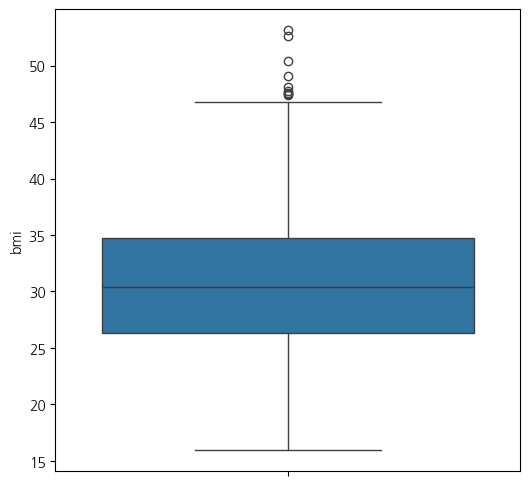

In [ ]:
# seaborn의 boxplot()으로 상자그림 그리기
plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.boxplot(data=df_ins, y='bmi', ax=ax)
plt.show()

입력된 데이터가 여러개의 변수를 가진 2차원 데이터구조이면 각 변수에 대한 여러 상자그림을 X 축으로 나열합니다.

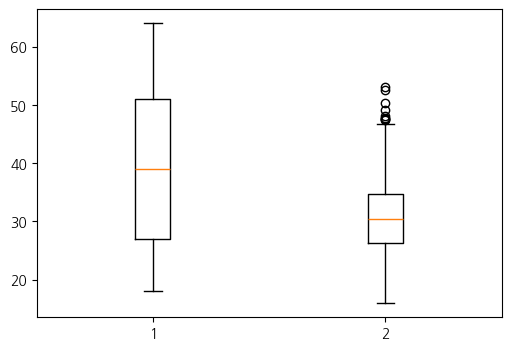

In [ ]:
# 여러개의 상자그림 그리기 plt에서 여러개의 컬럼 입력
plt.figure(figsize=(6,4))
ax = plt.subplot()
plt.boxplot(df_ins[['age','bmi']])
plt.show()

seaborn에서 `x`인자를 사용하면 그룹별로 나누어 상자그림을 그립니다

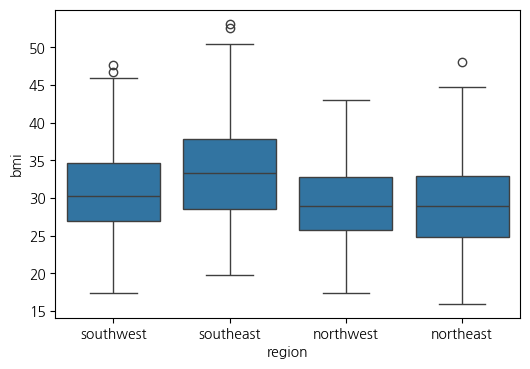

In [ ]:
# 그룹마다 상자 그려주기 seaborn의 x인자 사용
plt.figure(figsize=(6,4))
ax = plt.subplot()
sns.boxplot(data=df_ins,
            x='region',
            y='bmi', ax=ax)
plt.show()

## [참고] 결과 그래프의 저장
- `savefig()` 함수로 그래프를 저장 가능

In [ ]:
# 폴더 생성
import os
if not os.path.exists('결과'):
    os.makedirs('결과')

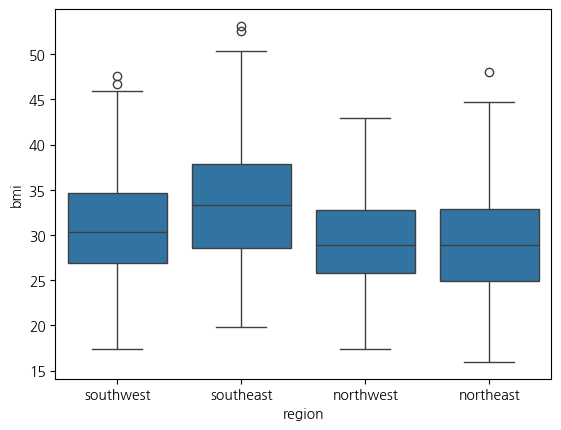

In [ ]:
# savefig()을 활용한 그래프 저장
sns.boxplot(data=df_ins,
            x='region',
            y='bmi')
plt.savefig('결과/plot1.jpg')

## 실습 해보기

#### [실습 2]
실습데이터 폴더의 국민건강보험공단_건강검진정보(샘플).csv 파일에서 다음 작업을 진행

1. '수축기혈압'의 히스토그램을 그리기
---
2. '연령대코드(5세단위)'와 '흡연상태'로 그룹화 하여 '수축기혈압'의 평균을 피벗테이블로 생성
3. 2번 결과에서 히트맵 그리기
---
4. 기존 데이터에서 '혈색소'를 '흡연상태'별로 색상을 나누어 상자그림 그리기

In [ ]:
df1 = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv')
df1.head()

,가입자일련번호,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,혈색소,흡연상태,음주여부,지역명
0,3746804,남자,55,165,108.0,65.0,55,75.1,169.0,NaN,15.3,흡연,마신다,대전
1,2522756,여자,35,165,107.0,64.0,65,79.0,79.0,NaN,14.6,비흡연,마시지 않는다,서울
2,3639084,남자,75,155,140.0,80.0,60,84.0,103.0,NaN,15.1,비흡연,마시지 않는다,전북
3,4018692,여자,55,155,121.0,66.0,60,83.0,86.0,NaN,13.0,비흡연,마시지 않는다,경기
4,2162974,여자,55,155,110.0,70.0,65,97.0,93.0,181.0,14.8,비흡연,마시지 않는다,부산


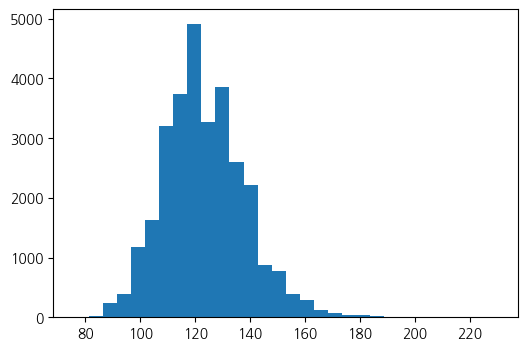

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
ax.hist(df1['수축기혈압'], bins=30)
plt.show()

In [ ]:
piv_df = pd.pivot_table(df1, index='연령대코드(5세단위)', columns='흡연상태', values='수축기혈압', aggfunc='mean')

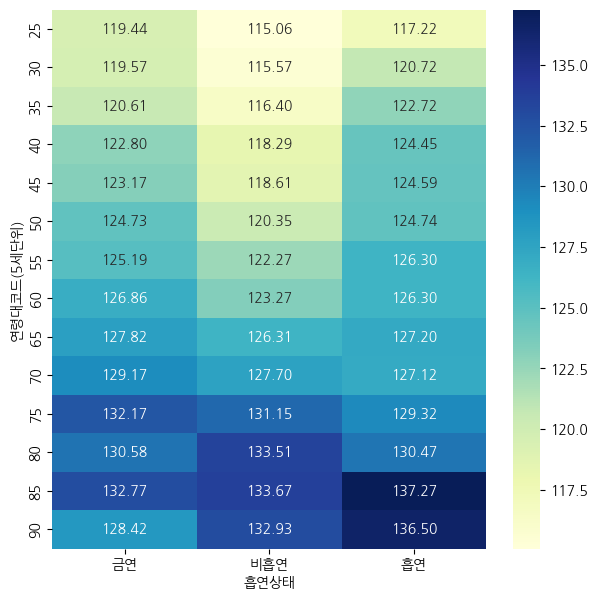

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.subplot()
sns.heatmap(piv_df, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

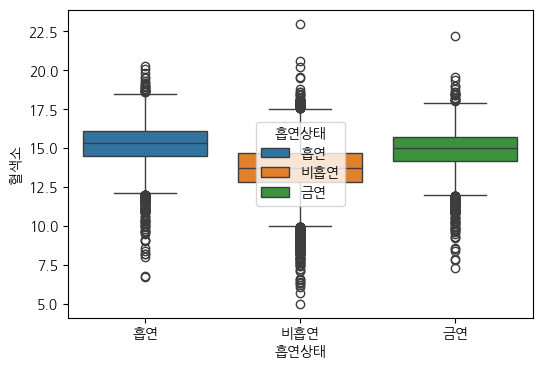

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
sns.boxplot(data=df1, x='흡연상태', y='혈색소', hue='흡연상태', ax=ax)
plt.show()

## 하나의 표안에 여러개의 그래프 그리기
matplotlib의 하나의 표(Axes)에는 여러개의 그래프를 중첩하여 그릴 수 있습니다.

하나의 표(Axes)에 여러 그래프를 중첩해서 그릴땐 `plt.show()` 호출전에 그래프함수를 연속적으로 호출합니다. (`plt` 에서도 동일)

In [ ]:
import pandas as pd

df_gp=pd.read_csv('data/건강보험심사평가원_진료비.csv')
pivot = pd.pivot_table(df_gp, index='진료년도', columns='시도',
                       values='환자수', aggfunc='mean')
pivot = pivot.astype('int64')
pivot

시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
진료년도,,,,,,,,,,,,,,,,,
2019,123011,527859,236392,155311,676426,713037,678315,461610,993947,428487,411540,498616,121379,192322,462630,214792,207499
2020,115143,496690,223017,143528,624156,652312,623671,425176,910314,434421,386520,462085,115593,182125,425883,201908,193511
2021,116638,526256,230792,145667,638731,685385,638228,438367,949162,472417,392802,481694,115925,184127,449047,207912,198832
2022,128238,584514,246755,157491,683306,735605,693963,471738,1049274,538844,424106,537475,123264,199426,494906,226475,218321
2023,127227,573130,238806,155261,679037,642940,677613,466225,1033476,550764,420545,526510,122530,195153,497281,225835,215340


#### 하나의 표안에 여러개의 선그래프 그리기
하나의 표(Axes)에 여러 그래프가 중첩되기 때문에 `label`과 `color`인자를 추가로 활용하여 그래프의 구분을 줍니다.

- `label` : 생성한 그래프의 이름 (범례에 표기)
- `color` : 생성한 그래프의 색상

구분된 그래프의 범례를 보기 위해선 `plt.legend()` 함수를 호출합니다.

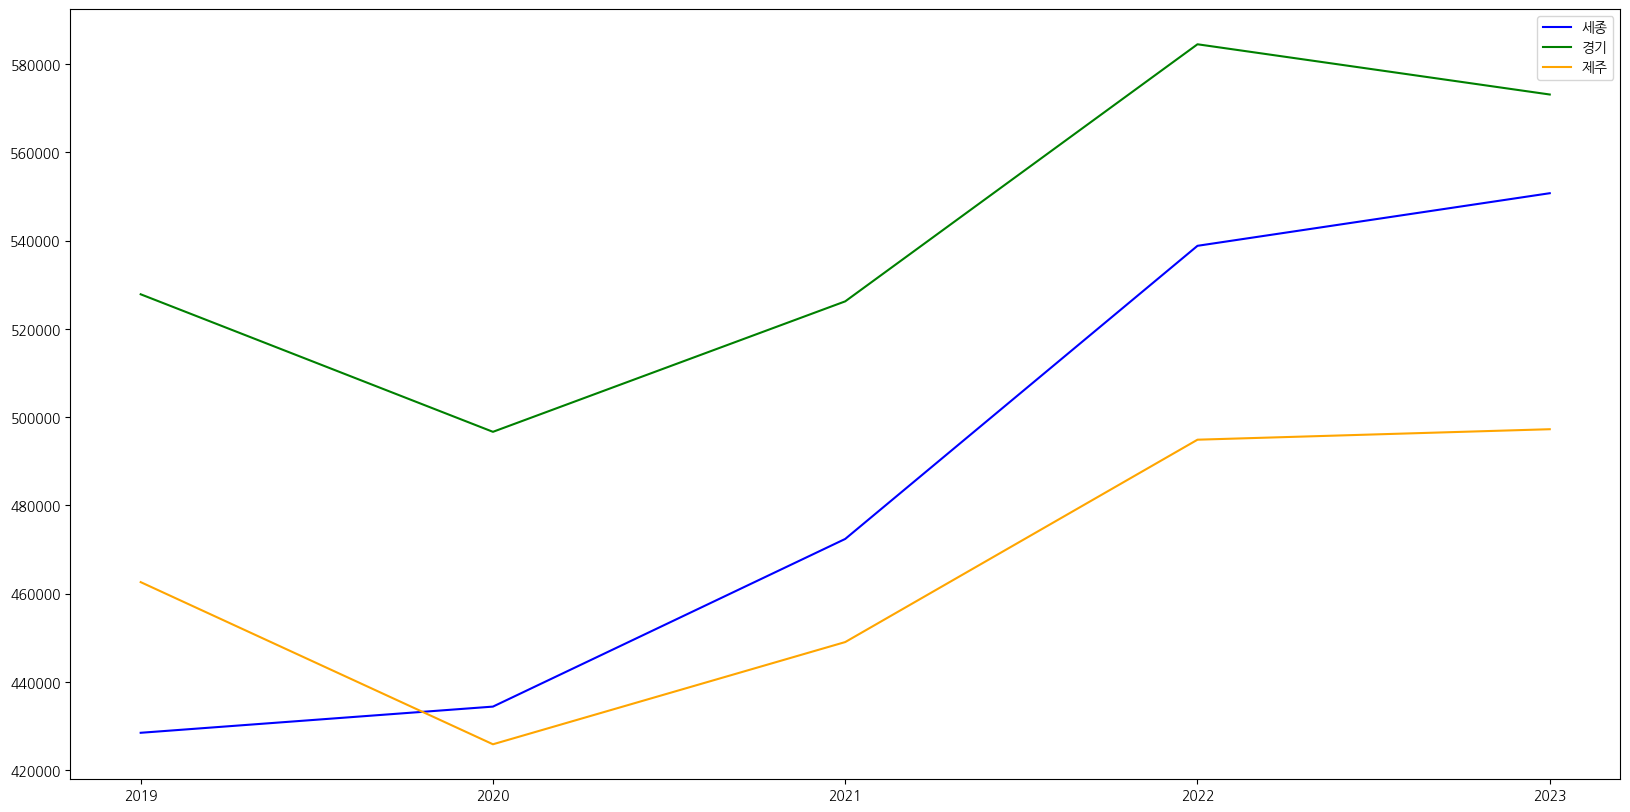

In [ ]:
x = pivot.index.astype('str')
y1 = pivot['세종']
y2 = pivot['경기']
y3 = pivot['제주']

plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.plot(x, y1, label = '세종', color = 'blue')
ax.plot(x, y2, label = '경기', color = 'green')
ax.plot(x, y3, label = '제주', color = 'orange')
plt.legend()
plt.show()

반복문을 적절히 사용하면 여러개의 그래프를 좀더 효율적으로 그릴 수 있습니다.

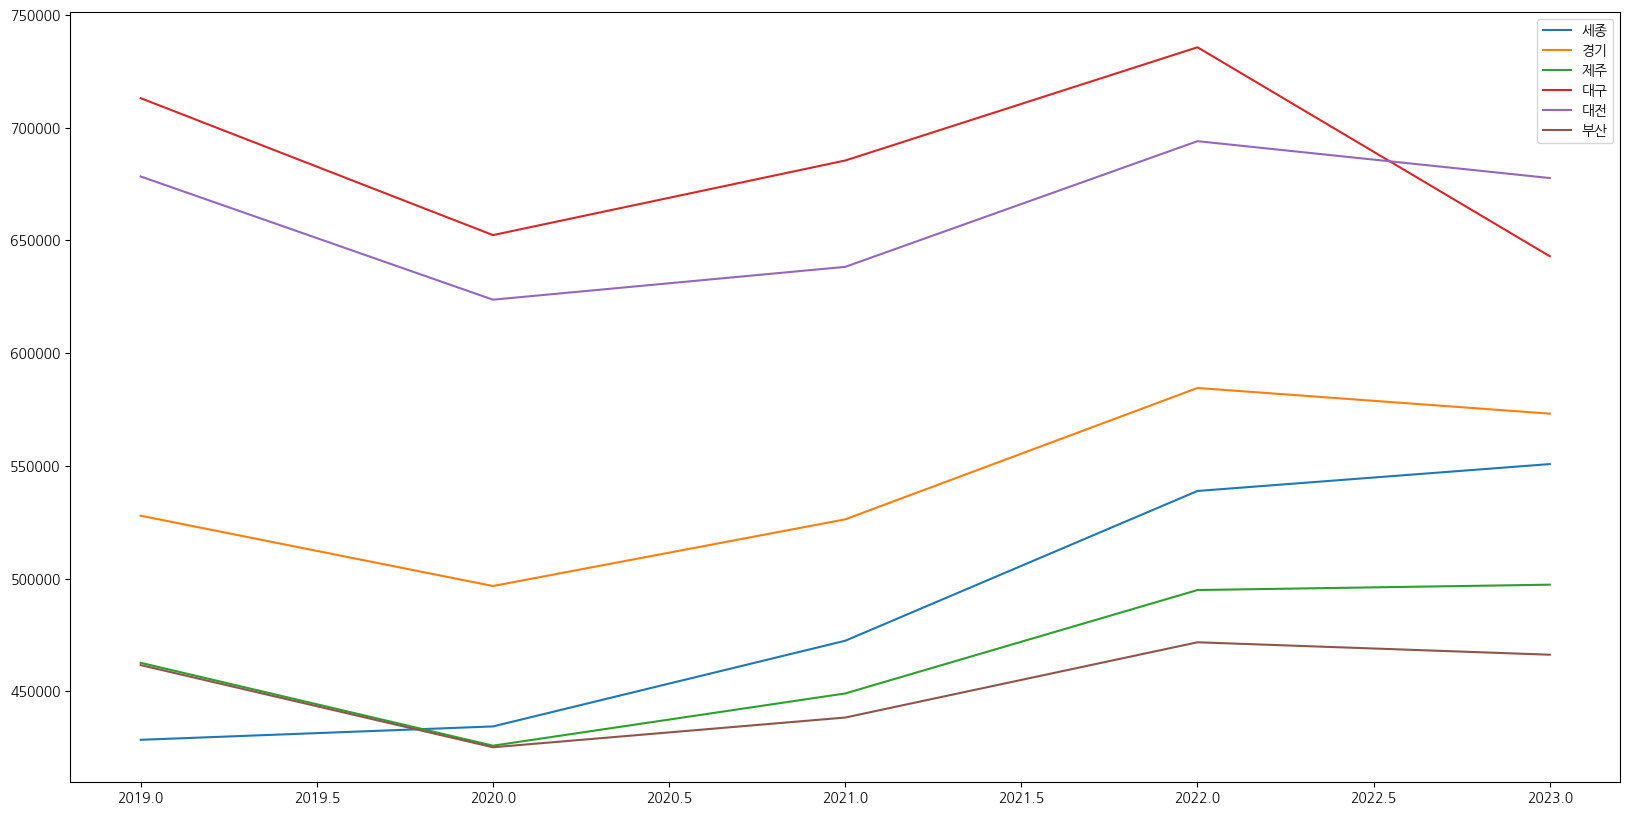

In [ ]:
# 컬럼 목록으로 반복문 활용
pivot_sub = pivot[['세종','경기','제주','대구','대전','부산']]

plt.figure(figsize=(20,10))
ax = plt.subplot()

for col in pivot_sub.columns:
    ax.plot(pivot_sub.index, pivot_sub[col], label = col)
ax.legend()
plt.show()

seaborn에서 `x`,`y` 인자를 설정하지 않으면 `data`에 입력된 DataFrame의 데이터를 자동으로 할당합니다. 이때 여러개의 컬럼을 가진경우 각 컬럼마다 그래프 중첩하여 그립니다.

- `x`: 비어있는경우 DataFrame의 인덱스가 자동 할당
- `y`: 비어있는경우 DataFrame의 컬럼이 할당, 컬럼이 여러개일 경우 컬럼마다 그래프를 각각 그려 여러개의 그래프 생성

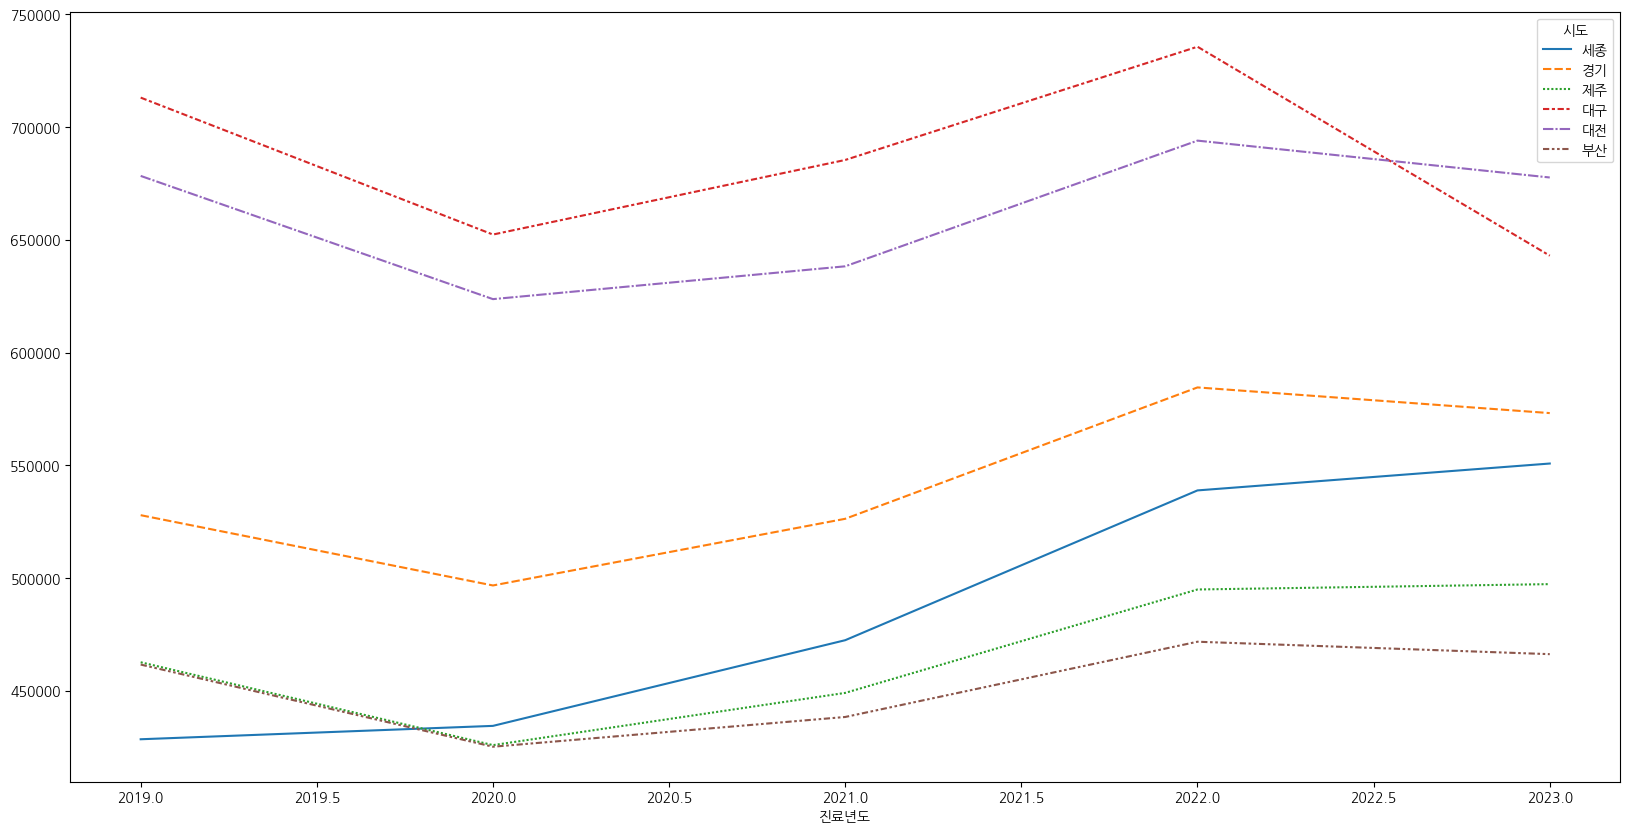

In [ ]:
# seaborn으로 간단하게 여러개의 선그래프 작성
pivot_sub = pivot[['세종','경기','제주','대구','대전','부산']]
plt.figure(figsize=(20,10))
ax = plt.subplot()
sns.lineplot(data = pivot_sub, ax = ax)
plt.show()

#### 막대그래프에 평균선 그리기
**matplotlib**은 `axhline()`와 `axvline()` 함수를 통해 표에 수평,수직선 그래프를 그릴 수 있습니다.
- `axhline()`: 수평선그래프
- `axvline()`: 수직선그래프

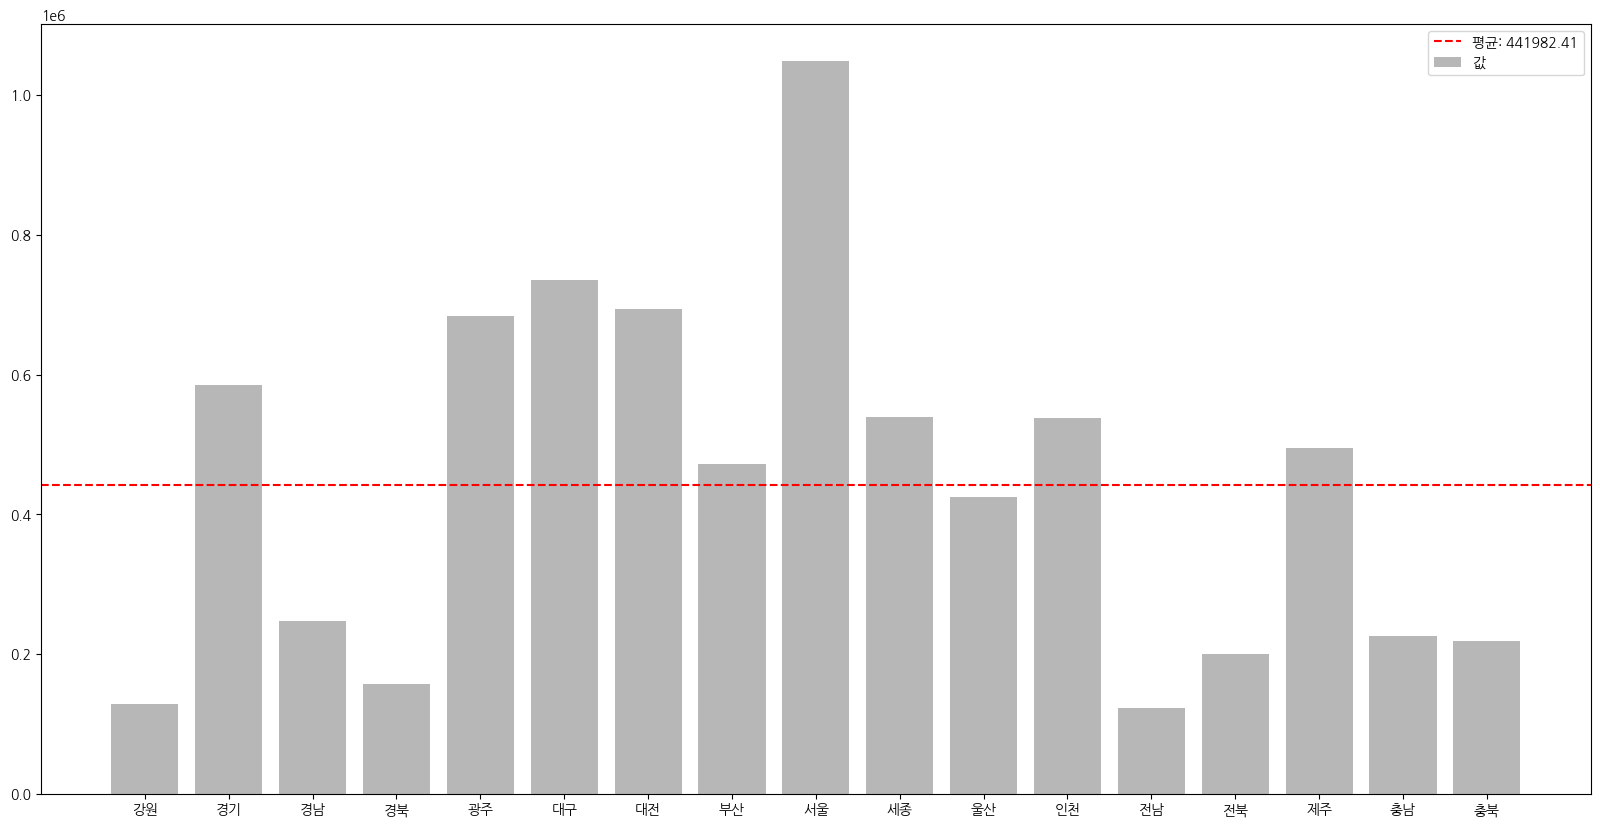

In [ ]:
# 막대그래프에 평균선 그리기
pivot_2022 = pivot.loc[2022]
mean = pivot_2022.mean() # 평균 산출

plt.figure(figsize=(20,10))
ax = plt.subplot()

ax.bar(x=pivot_2022.index, height=pivot_2022, color = '#B7B7B7', label='값')
ax.axhline(mean, color='red', linestyle='--', label=f'평균: {mean:.2f}')
plt.legend()
plt.show()

> `linestyle` 인자를 활용하여 선의 스타일을 지정 가능 [선스타일](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

#### 중첩 막대그래프 그리기
여러그래프를 중첩해서 그리는 방법중 많이 활용되는 방법은 막대그래프를 중첩하여 다양한 비교군을 한번에 시각화 하는 방법입니다.

`bar()` 함수에서 `bottom` 인자를 활용하면 두개 이상의 막대그래프를 순서대로 위에 쌓아올리는 방식으로 중첩하여 그릴수 있습니다.

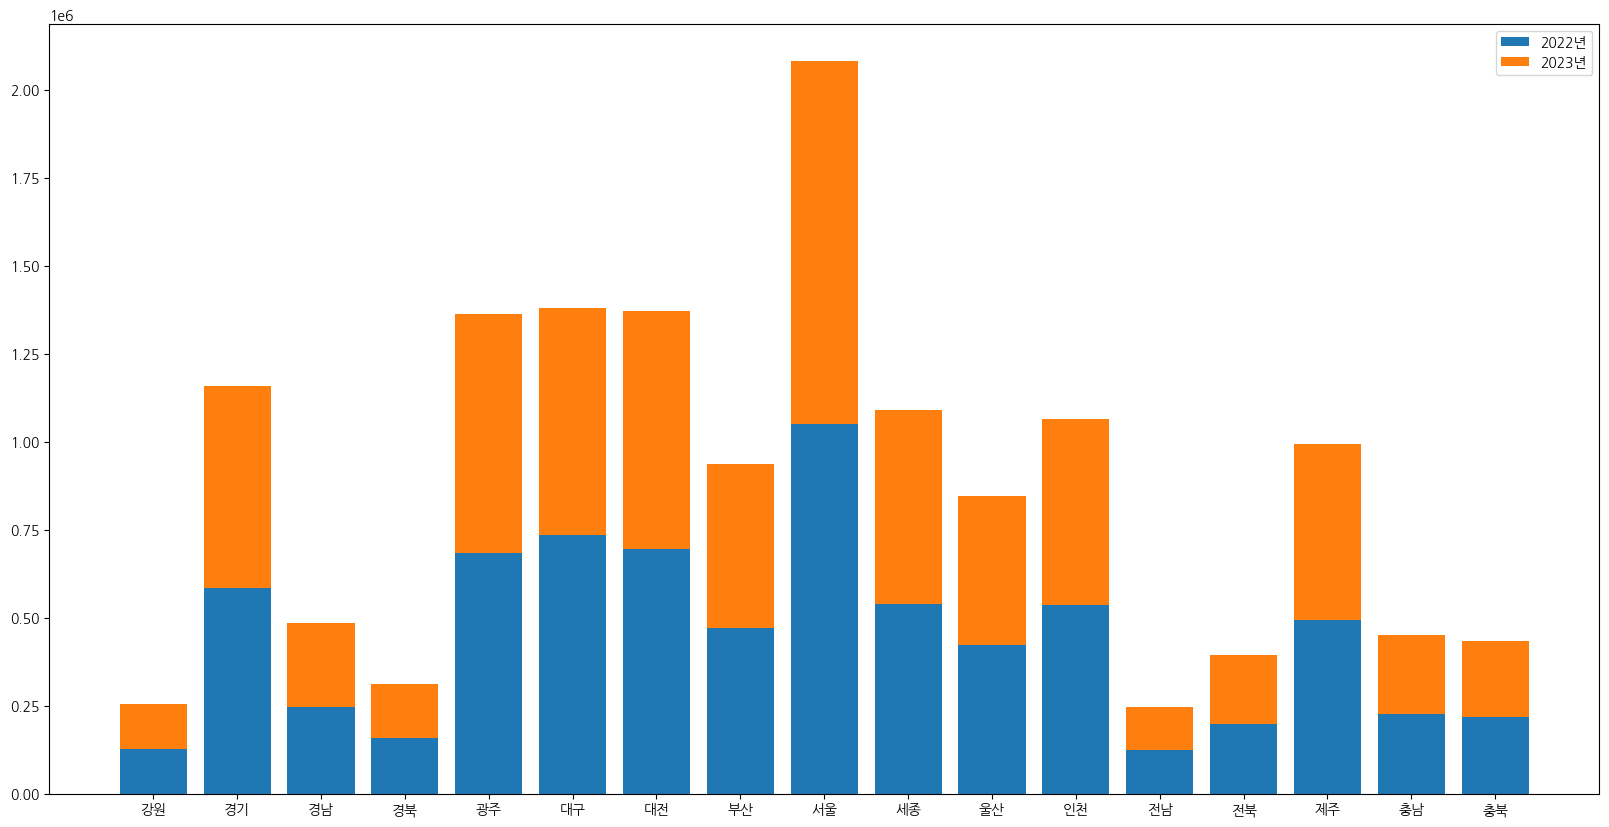

In [ ]:
pivot_2022 = pivot.loc[2022]
pivot_2023 = pivot.loc[2023]

plt.figure(figsize=(20,10))
ax = plt.subplot()

# 2022 데이터를 먼저 막대 시각화
ax.bar(pivot_2022.index, pivot_2022, label='2022년')
# 2022 데이터 위에 중첩하여 시각화
ax.bar(pivot_2023.index, pivot_2023, bottom=pivot_2022, label='2023년')

plt.legend()
plt.show()

#### 그룹 수직 막대그래프
중첩 막대그래프와 비슷하게 두개이상의 비교 막대그래프를 옆(수평)으로 나열해서 그리는 그룹 막대그래프도 많이 활용됩니다.

그룹 막대그래프를 그리기 위해선 막대 그래프의 너비를 반으로 줄이고 중앙 위치(오프셋)을 조정합니다.

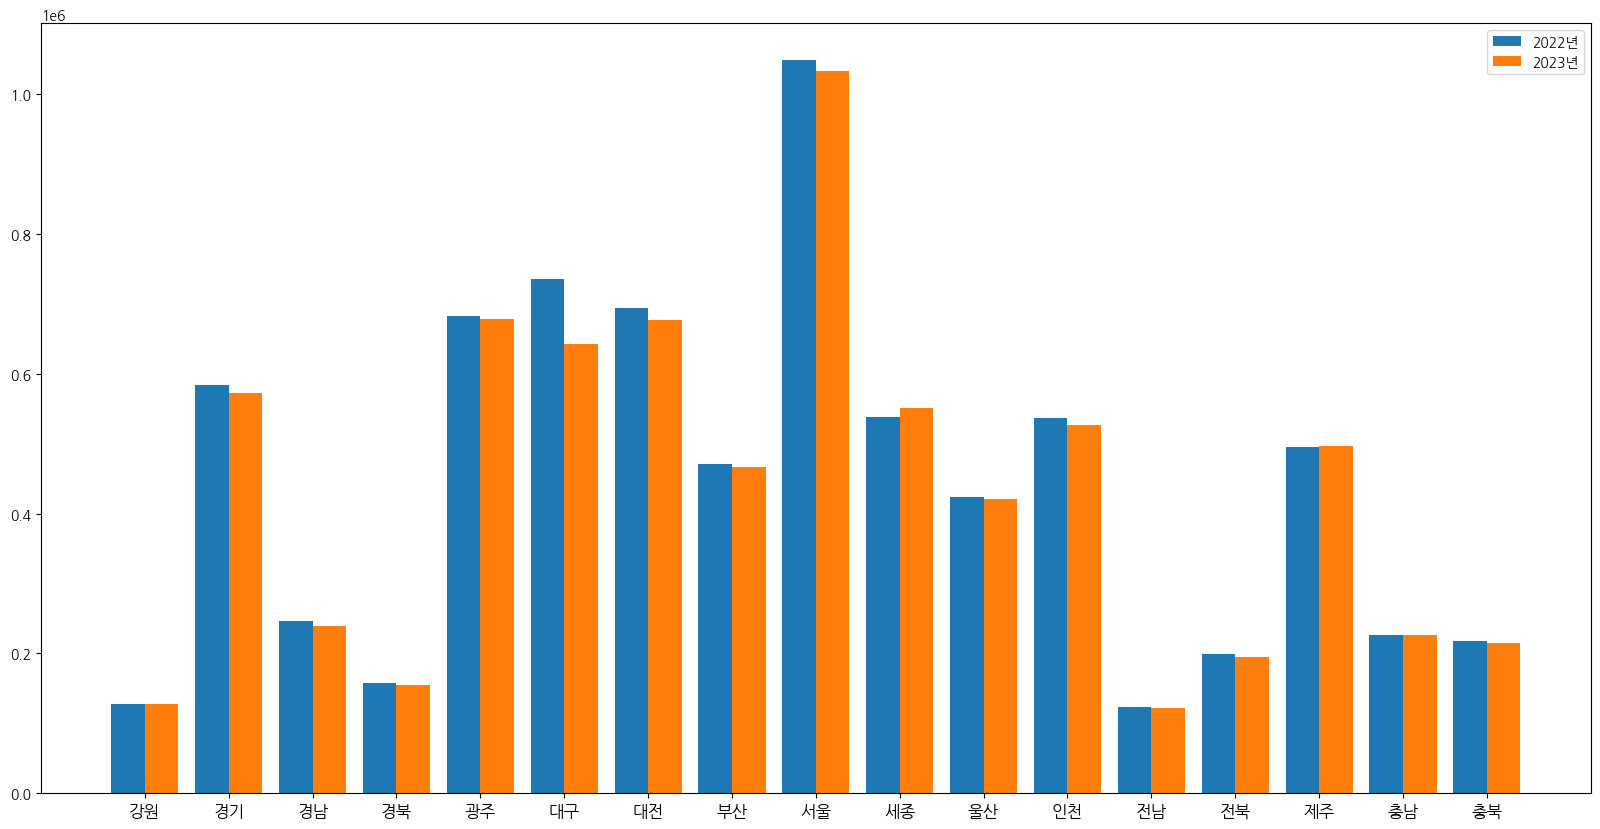

In [ ]:
pivot_2022 = pivot.loc[2022]
pivot_2023 = pivot.loc[2023]

plt.figure(figsize=(20,10))
ax = plt.subplot()

# 막대 너비 설정
bar_width = 0.4
# 막대 위치 조정
x1 = [i - bar_width/2 for i in range(len(pivot_2022))]  # 첫번째 막대 상대 위치
x2 = [i + bar_width/2 for i in range(len(pivot_2023))]  # 두번째 막대 상대 위치

# 첫 번째 막대
ax.bar(x1, pivot_2022, bar_width, label='2022년')
# 두 번째 막대
ax.bar(x2, pivot_2023, bar_width, label='2023년')
ax.set_xticks(range(len(x1)))
ax.set_xticklabels(pivot_2022.index, fontsize=12)

plt.legend()
plt.show()

## 하나의 그림판에 여러개의 표 그리기
하나의 그림판에 여러개의 Axes를 생성하여 정렬된 여러개의 표를 그릴 수도 있습니다. 이는 동일한 변수 내에서도 그래프에 따라 다양한 특징을 발견할 때 유용합니다.

#### *subplot()* 함수로 여러개의 표 생성

1.   List item
2.   List item


**subplot()** 함수를 활용하면 그리드 형태로 배치되는 여러개의 Axes를 생성할 수 있습니다.

이때 `row`, `col`, `index` 인자에 따라 그리드 형태와 생성할 Axes의 위치가 정해지게 됩니다.
- `row`: 행의 개수를 지정
- `col`: 열의 개수를 지정
- `index`: `row`, `col`값으로 만들어진 그리드의 순번을 통해 원하는 위치의 표를 생성


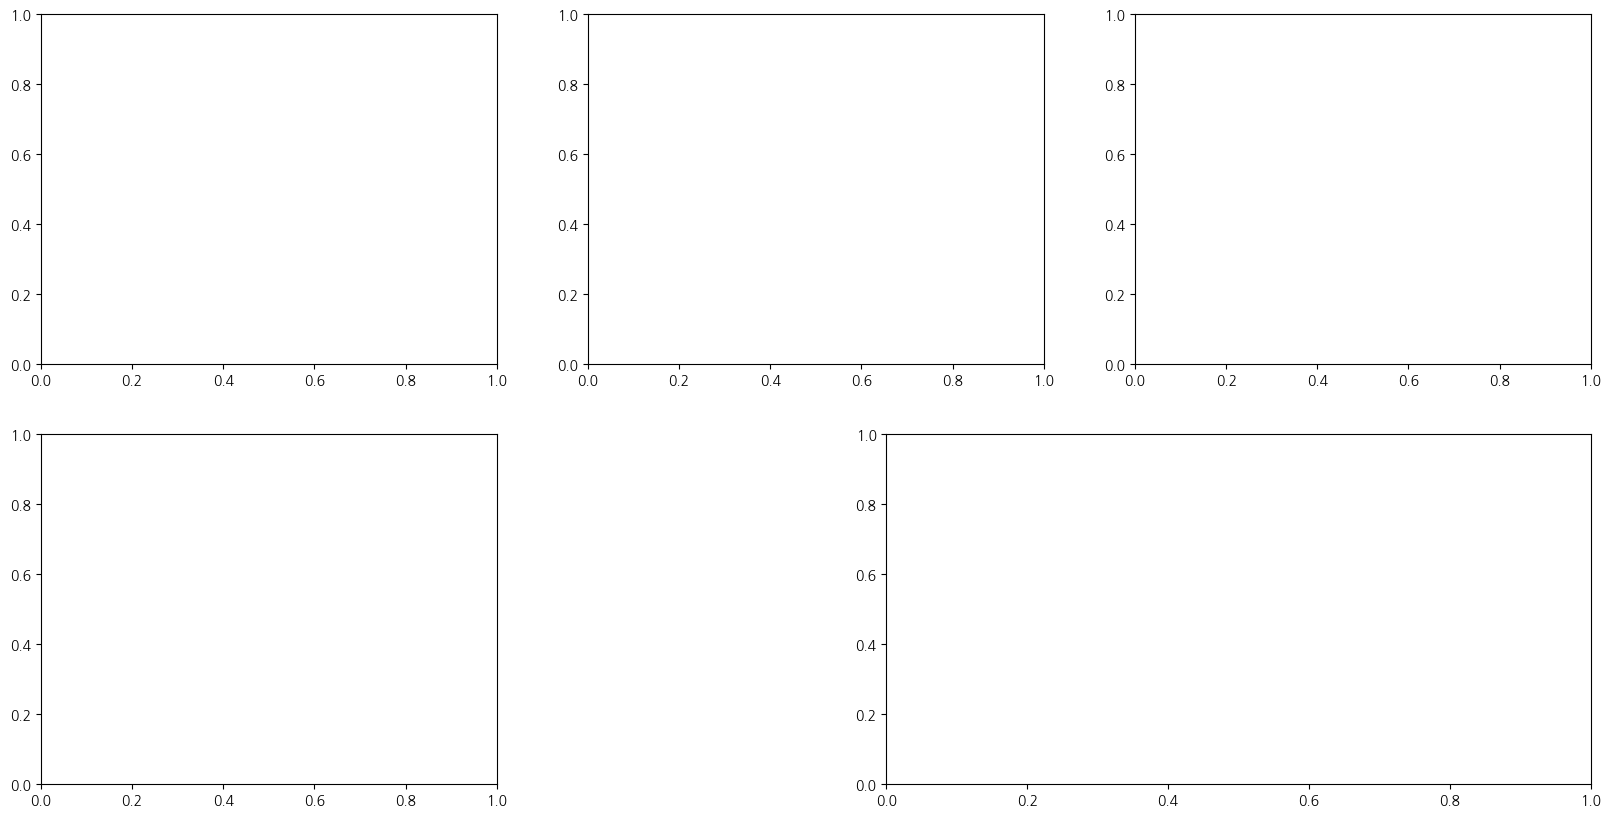

In [ ]:
# Axes 배치하기
plt.figure(figsize = (20,10))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 2, 4)
plt.show()

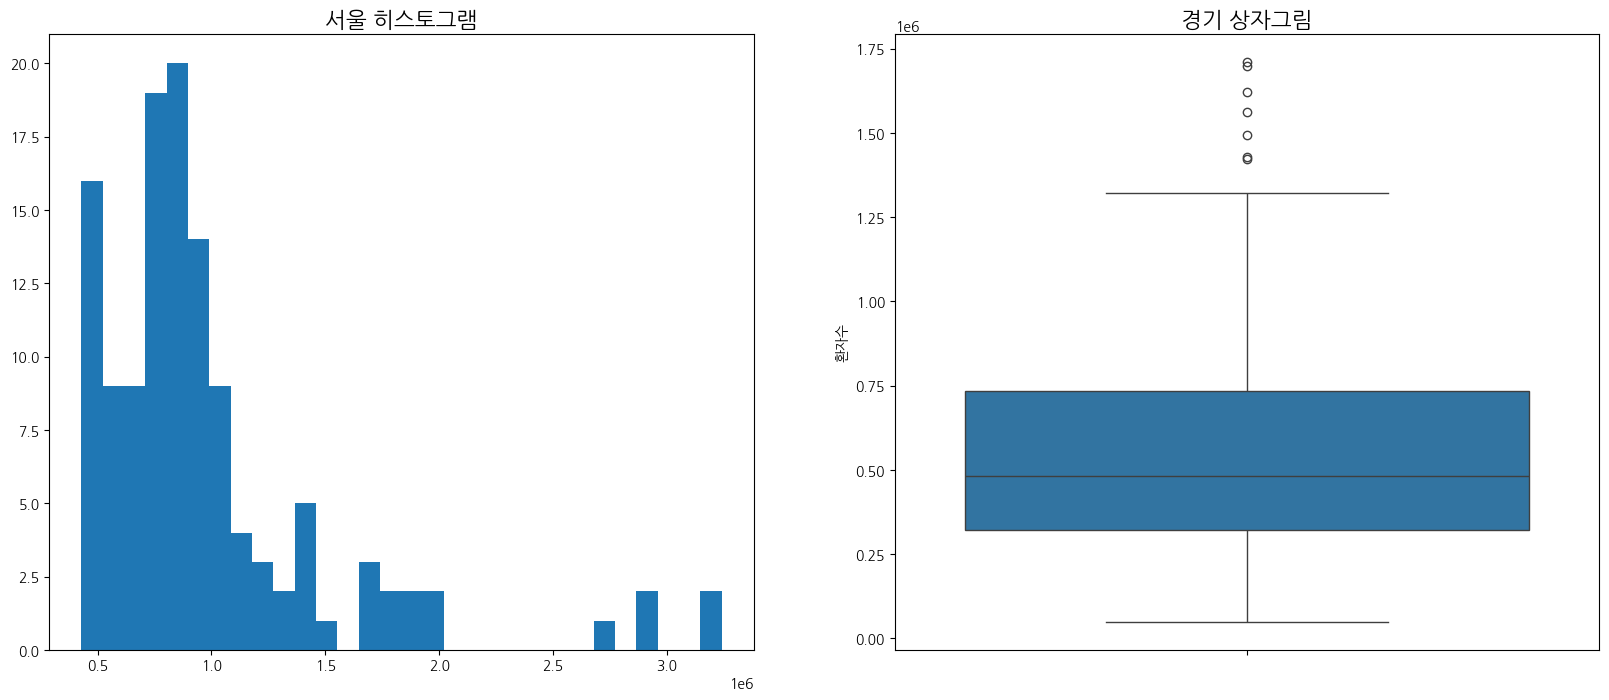

In [ ]:
df_gp=pd.read_csv('data/건강보험심사평가원_진료비.csv')
df_sl = df_gp[df_gp['시도'] == '서울']
df_gg = df_gp[df_gp['시도'] == '경기']


plt.figure(figsize = (20,8))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.hist(x=df_sl['환자수'], bins=30)
ax1.set_title('서울 히스토그램',fontsize = 16)

sns.boxplot(data=df_gg,
            y='환자수', ax = ax2)
ax2.set_title('경기 상자그림', fontsize = 16)

plt.show()

## 실습 해보기

#### [실습 3]

진료정보_통합.csv 파일에서 다음 작업 진행

1. '날짜'가 '2023' 보다 크고 '지역명'이 '서울'인 관측치를 인덱싱
2. 1번 결과에서 날짜별 '천식','눈병','피부병'의 추이를 하나의 표안에 여러개의 선그래프로 그리기
---
3. '날짜'가 '2023' 보다 큰 관측치에서 '지역명'으로 그룹화 하여 '눈병', '피부병' 의 평균을 생성
4. 3번의 결과에서 '서울','경기','부산','대구','대전' 5개 지역만 선택하여 부분 데이터프레임 생성
5. 4번의 결과에서 다음과 같은 3개의 그래프를 각각의 표로 하나의 그림판 안에 그리기 (배치는 자유롭게)

    a. 5개 지역에 해당하는 '눈병'의 지역별 값을 막대그래프로 그리고 5개 지역의 총 평균을 평균선으로 중첩하여 그리기

    b. 5개 지역에 해당하는 '피부병'의 지역별 값을 막대그래프로 그리고 5개 지역의 총 평균을 평균선으로 중첩하여 그리기

    c. 5개 지역에 해당하는 '눈병'과 '피부병'을 다른색의 중첩 막대그래프로 표현하고 범례표기

In [ ]:
df2 = pd.read_csv('/content/실습데이터/진료정보_통합.csv')

In [ ]:
df2['날짜'] = pd.to_datetime(df2['날짜'])

In [ ]:
df2_2023 = df2[(df2['날짜'].dt.year >= 2023)]

In [ ]:
df2_2023_2 = df2_2023[['눈병','피부병', '지역명']].groupby('지역명').mean()

In [ ]:
regional_df = df2_2023_2[df2_2023_2.index.isin(['서울','경기','부산','대구','대전'])]
regional_df

,눈병,피부병
지역명,,
경기,8958.958333,10033.366667
대구,1858.591667,2070.941667
대전,1003.800000,1294.275000
부산,2291.100000,2838.050000
서울,6241.291667,7585.925000


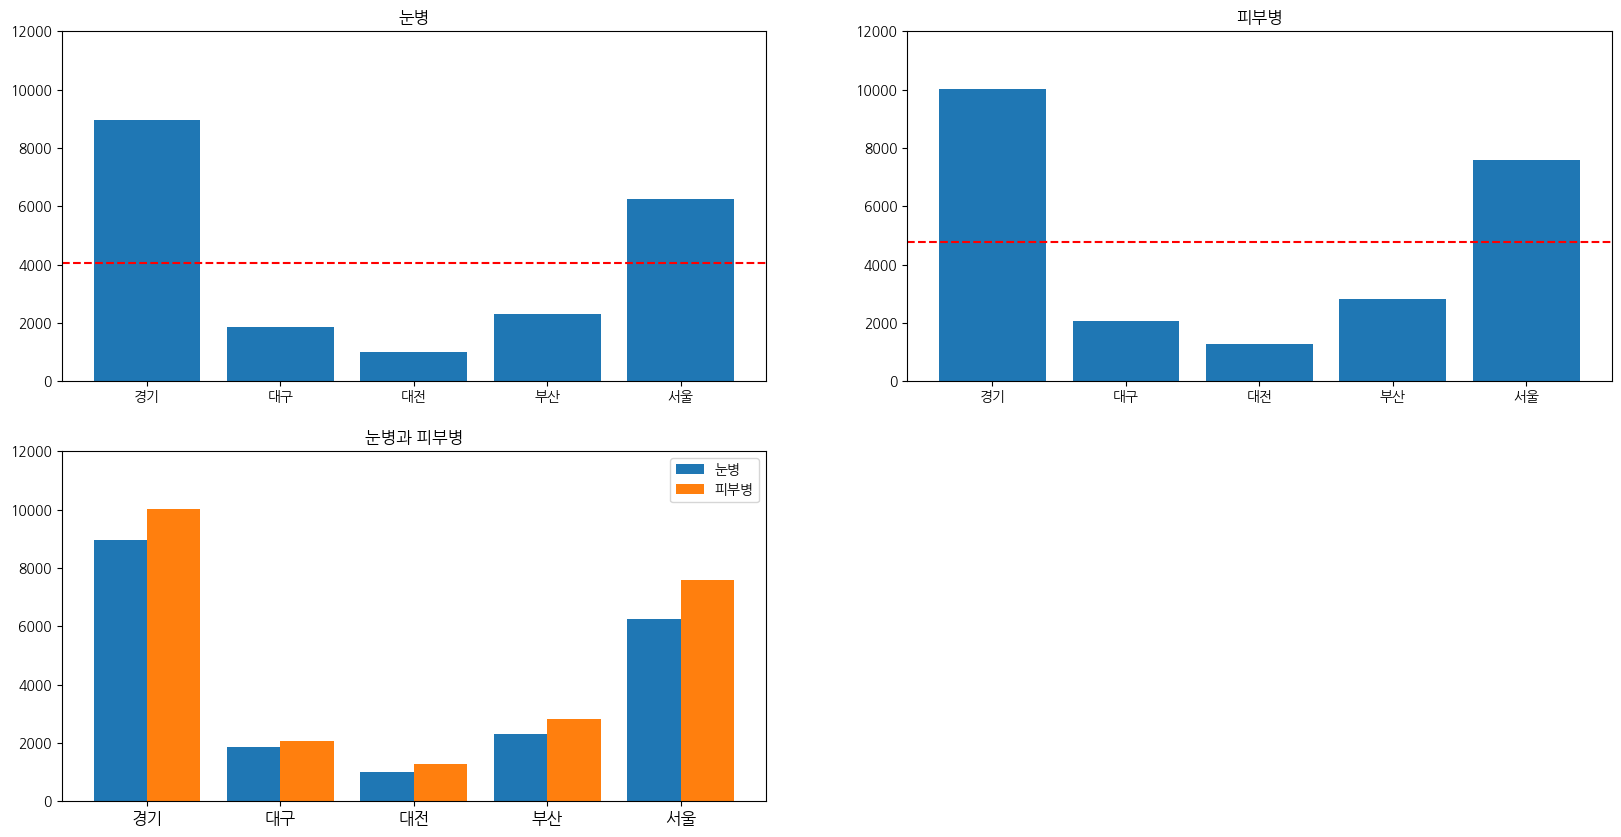

In [ ]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)


ax1.set_ylim(0,12000)
ax2.set_ylim(0,12000)
ax3.set_ylim(0,12000)



ax1.bar(regional_df.index, regional_df['눈병'], label='눈병')
ax1.axhline(regional_df['눈병'].mean(), color='red', linestyle='--', label=f'눈병 평균: {regional_df["눈병"].mean():.2f}')
ax1.set_title('눈병')


ax2.bar(regional_df.index, regional_df['피부병'], label='피부병')
ax2.axhline(regional_df['피부병'].mean(), color='red', linestyle='--', label=f'피부병 평균: {regional_df["피부병"].mean():.2f}')
ax2.set_title('피부병')


bar_width = 0.4
x1 = [i - bar_width/2 for i in range(len(regional_df))]
x2 = [i + bar_width/2 for i in range(len(regional_df))]

ax3.bar(x1, regional_df['눈병'], bar_width, label='눈병')
ax3.bar(x2, regional_df['피부병'],bar_width, label='피부병')
ax3.set_title('눈병과 피부병')
ax3.set_xticks(range(len(x1)))
ax3.set_xticklabels(regional_df.index, fontsize=12)

plt.legend()
plt.show()